**What is SPEC score ?**<br><br>
**So, Basically It's provide rating based on the Specification of smartphone and performance evaluation .It is widely used by many website to showcase the quality , performance and other important aspect of a smatphone . So i tried here to create a model which able to predict SPEC score for a handset.** 

# **Feature Engineering.**

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_rows', None)

In [0]:
df= pd.read_csv('modify.csv')
data=df.copy()
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


In [0]:
def handling_dtype(data):
	data['3G']=data['3G'].astype(str)
	data['4G']=data['4G'].astype(str)
	data['5G']=data['5G'].astype(str)
	data['VoLTE']=data['VoLTE'].astype(str)
	data['Wi-Fi']=data['Wi-Fi'].astype(str)
	data['IR Blaster']=data['IR Blaster'].astype(str)
	data['HDMI']=data['HDMI'].astype(str)
	data['Quad Sim']=data['Quad Sim'].astype(str)
	data['Triple Sim']=data['Triple Sim'].astype(str)
	data['Single Sim']=data['Single Sim'].astype(str)
	data['Dual Sim']=data['Dual Sim'].astype(str)
	data['NFC']=data['NFC'].astype(str)

	data['Front_cam_2'][data['Front_cam_2']=="[' 8  ', ' TOF 3D Dual Front Camera']"]=data['Front_cam_2'].mode()
	data['Front_cam_2']=data['Front_cam_2'].astype(float)

	data['Front_cam_1']=data['Front_cam_1'].astype(str)
	data['Front_cam_1']=data['Front_cam_1'].apply(lambda x:x.replace(' ','').replace("'",'').replace('[','').split(',')[0] if '[' in x else x )
	data['Front_cam_1']=data['Front_cam_1'].astype(float)
	data['Front_cam_1'].unique()

	data['Single_cam'][data['Single_cam']=='No']=data['Single_cam'].mode()
	data['Single_cam']=data['Single_cam'].astype(float)


**Some data type conversions.**

In [0]:
handling_dtype(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2000 non-null   int64  
 1   pid                    2000 non-null   object 
 2   score-val              2000 non-null   int64  
 3   name                   2000 non-null   object 
 4   price                  2000 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  2000 non-null   object 
 7   Processor(GHz)         1532 non-null   float64
 8   Processor              1536 non-null   object 
 9   Core                   1536 non-null   object 
 10  RAM(GB)                1836 non-null   float64
 11  Memory(GB)             1897 non-null   float64
 12  Battery                1856 non-null   float64
 13  Screen_size(inches)    1906 non-null   float64
 14  Display                1906 non-null   object 
 15  Memo

In [0]:
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,Xiaomi Redmi Note 9 Pro Max,9.711055,1.4,Xiaomi,2.3,Snapdragon 720G,Octa Core,6.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,32.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,64,0.0,0,0.0,0
1,1,pd1avaexqac,76,Xiaomi Redmi Note 9 Pro,9.546741,NaN,Xiaomi,2.3,Snapdragon 720G,Octa Core,4.0,64.0,8.521185,6.67,1080 x 2400 px Display with Punch Hole,512.0,Android v10.0,Snapdragon,16.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,48,0.0,0,0.0,0
2,2,pd1xq857m1x,74,Realme Narzo 10,9.392579,0.7,Realme,2.0,Helio G80,Octa Core,4.0,128.0,8.517193,6.50,720 x 1600 px Display with Water Drop Notch,256.0,Android v10,Helio,16.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,Samsung Galaxy M31,9.680281,1.4,Samsung,2.3,Exynos 9611,Octa Core,6.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,32.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,Samsung Galaxy M21,9.449279,1.4,Samsung,2.3,Exynos 9611,Octa Core,4.0,64.0,8.699515,6.40,1080 x 2340 px Display with Water Drop Notch,512.0,Android v10.0,Exynos,20.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0.0,48,0.0,0


**Dropping rows which have null score-val value(beacuse it is our dependable varibale).**

In [0]:
data.dropna(subset=['score-val'],inplace=True)

In [0]:
features=[feature for feature in data.columns]

In [0]:
numeric_feature = [feature for feature in features if data[feature].dtypes!='O']
numeric_feature

['Unnamed: 0',
 'score-val',
 'price',
 'rating',
 'Processor(GHz)',
 'RAM(GB)',
 'Memory(GB)',
 'Battery',
 'Screen_size(inches)',
 'Memory_card_supported',
 'Front_cam_1',
 'Front_cam_2',
 'Quad_cam',
 'Single_cam',
 'Triple_cam',
 'Dual_cam',
 'Penta_cam']

In [0]:
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']
categorical_features= list(set(categorical_features)-set(['pid']))
categorical_features

['NFC',
 'Triple Sim',
 'Quad Sim',
 'Wi-Fi',
 'IR Blaster',
 'Android-v',
 'Processor',
 'Processor_brand',
 'Core',
 'VoLTE',
 'HDMI',
 '4G',
 'Single Sim',
 '5G',
 'name',
 'Display',
 '3G',
 'Dual Sim',
 'Brand']

**Handling missing values in both numerical as well as categorical features.**

In [0]:
for feature in numeric_feature:
  nan = data[feature].median()
  data[feature].fillna(nan, inplace=True)
  
for feature in categorical_features:
  nan = data[feature].mode()[0]
  data[feature].fillna(nan, inplace=True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1675 non-null   int64  
 1   pid                    1675 non-null   object 
 2   score-val              1675 non-null   int64  
 3   name                   1675 non-null   object 
 4   price                  1675 non-null   float64
 5   rating                 1675 non-null   float64
 6   Brand                  1675 non-null   object 
 7   Processor(GHz)         1675 non-null   float64
 8   Processor              1292 non-null   object 
 9   Core                   1292 non-null   object 
 10  RAM(GB)                1675 non-null   float64
 11  Memory(GB)             1675 non-null   float64
 12  Battery                1675 non-null   float64
 13  Screen_size(inches)    1675 non-null   float64
 14  Display                1592 non-null   object 
 15  Memo

**Handling Categorical features as it requires to convert into some form before feeding into the model as i'm going for simply converting into numerical variable instead of converting into one hot encdoing or using label encoder library.**

In [0]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0,pd18nrbx50l,80,994,9.711055,1.4,139,2.3,200,3,6.0,64.0,8.521185,6.67,137,512.0,31,15,32.0,0.0,0,1,1,1,1,1,0,0,0,0,0,1,64,0.0,0,0.0,0
2,2,pd1xq857m1x,74,802,9.392579,0.7,129,2.0,135,3,4.0,128.0,8.517193,6.50,94,256.0,29,23,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,48,0.0,0,0.0,0
3,3,pd1sbe530da,80,980,9.680281,1.4,148,2.3,186,3,6.0,64.0,8.699515,6.40,71,512.0,31,34,32.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,64,0.0,0,0.0,0
4,4,pd1dj4jnzb4,76,816,9.449279,1.4,148,2.3,186,3,4.0,64.0,8.699515,6.40,71,512.0,31,34,20.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,48,0.0,0
5,5,pd1f4dycqja,58,270,8.160232,1.0,129,2.0,0,3,3.0,32.0,8.294050,6.10,39,128.0,12,23,5.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0


**Shuffling dataset**

In [0]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,pid,score-val,name,price,rating,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,1014,pd1uvq1pnvb,66,774,9.384294,1.50,129,2.1,126,3,3.0,64.0,8.160518,6.30,71,256.0,19,22,25.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
1,1786,pd1tgsi9nks,15,179,7.150701,1.70,40,2.2,0,3,4.0,240.0,8.229511,6.20,13,256.0,12,15,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.0,0,0.0,0
2,1260,pd1ikdbssfz,57,776,9.391828,1.50,150,1.8,111,3,3.0,32.0,8.294050,6.26,80,512.0,19,15,8.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
3,93,pd1n5p306ff,87,1456,10.598458,1.35,139,2.2,246,3,8.0,256.0,8.567886,6.47,71,256.0,12,15,32.0,0.0,0,1,1,1,1,1,0,0,1,0,0,1,0,108.0,0,0.0,108
4,1749,pd1yl2hpbv6,64,911,9.615139,1.20,146,1.8,155,3,4.0,128.0,8.517193,6.50,94,256.0,12,15,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,16.0,0


**Creating seperate train and test dataset.**

In [0]:
train_data=data[:1500]
#train_data=data.copy()
test_data=data[1500:]

In [0]:
orig_df=data[['pid','score-val']][1500:]
orig_df.head()

,pid,score-val
1500,pd177qoyl3i,54
1501,pd1mhybj7g2,81
1502,pd1bchr1cwt,81
1503,pd1c4vgk4ap,84
1504,pd1ugs68pd4,70


In [0]:
orig_df=data[['pid','score-val']][1500:]
orig_df.head()

,pid,score-val
1500,pd177qoyl3i,54
1501,pd1mhybj7g2,81
1502,pd1bchr1cwt,81
1503,pd1c4vgk4ap,84
1504,pd1ugs68pd4,70


**Dropping uncessery columns.**

In [0]:
train_data.drop(['Unnamed: 0','name','pid','rating'],inplace=True,axis=1)
train_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,score-val,price,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,66,9.384294,129,2.1,126,3,3.0,64.0,8.160518,6.30,71,256.0,19,22,25.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
1,15,7.150701,40,2.2,0,3,4.0,240.0,8.229511,6.20,13,256.0,12,15,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,13.0,0,0.0,0
2,57,9.391828,150,1.8,111,3,3.0,32.0,8.294050,6.26,80,512.0,19,15,8.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,13.0,0
3,87,10.598458,139,2.2,246,3,8.0,256.0,8.567886,6.47,71,256.0,12,15,32.0,0.0,0,1,1,1,1,1,0,0,1,0,0,1,0,108.0,0,0.0,108
4,64,9.615139,146,1.8,155,3,4.0,128.0,8.517193,6.50,94,256.0,12,15,16.0,0.0,0,1,1,1,1,0,0,0,0,0,0,1,0,0.0,0,16.0,0


# **Feature Selection**

**Importing lasso for feature selection.**

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [0]:
feature_scale=[feature for feature in train_data.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
train_data = pd.DataFrame(scaler.transform(train_data[feature_scale]), columns=feature_scale)
train_data.head()

,score-val,price,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
0,0.666667,0.548731,0.758824,0.561224,0.406452,0.6,0.031746,0.087622,0.539972,0.779221,0.344660,0.499022,0.463415,0.536585,0.567494,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.203125,0.0
1,0.100000,0.292812,0.235294,0.612245,0.000000,0.6,0.047619,0.332406,0.559353,0.766234,0.063107,0.499022,0.292683,0.365854,0.294332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.12037,0.0,0.000000,0.0
2,0.566667,0.549594,0.882353,0.408163,0.358065,0.6,0.031746,0.043115,0.577483,0.774026,0.388350,1.000000,0.463415,0.365854,0.180514,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.203125,0.0
3,0.900000,0.687846,0.817647,0.612245,0.793548,0.6,0.111111,0.354659,0.654408,0.801299,0.344660,0.499022,0.292683,0.365854,0.726838,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00000,0.0,0.000000,1.0
4,0.644444,0.575180,0.858824,0.408163,0.500000,0.6,0.047619,0.176634,0.640167,0.805195,0.456311,0.499022,0.292683,0.365854,0.362622,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.250000,0.0


In [0]:
train_data.corr()

,score-val,price,Brand,Processor(GHz),Processor,Core,RAM(GB),Memory(GB),Battery,Screen_size(inches),Display,Memory_card_supported,Android-v,Processor_brand,Front_cam_1,Front_cam_2,Dual Sim,3G,4G,VoLTE,Wi-Fi,IR Blaster,Single Sim,5G,NFC,HDMI,Quad Sim,Triple Sim,Quad_cam,Single_cam,Triple_cam,Dual_cam,Penta_cam
score-val,1.000000,0.918254,0.816448,0.322314,0.817097,0.104717,-0.366282,0.339697,0.627147,0.763691,0.763849,0.233902,0.388802,0.330047,0.380508,0.173145,-0.098345,0.834848,0.842479,0.697682,0.845323,0.183882,-0.066807,0.355674,0.473620,-0.000522,-0.017662,0.097584,0.369025,-0.194742,0.337549,0.206139,0.067625
price,0.918254,1.000000,0.852518,0.388745,0.861371,0.149554,-0.323145,0.421013,0.529534,0.677689,0.816294,0.205798,0.400169,0.355990,0.317332,0.159304,0.050282,0.748868,0.747662,0.610306,0.761956,0.152191,0.075683,0.354186,0.561329,0.024761,0.003547,0.074982,0.281683,-0.128703,0.311362,0.181197,0.062252
Brand,0.816448,0.852518,1.000000,0.203661,0.731413,0.097834,-0.378172,0.257659,0.483866,0.631108,0.687221,0.303341,0.380920,0.408010,0.224856,0.092629,0.058164,0.714846,0.705327,0.601564,0.735596,0.134670,0.088341,0.209312,0.421525,0.027785,-0.003652,0.092512,0.207999,-0.120946,0.250348,0.191046,0.032498
Processor(GHz),0.322314,0.388745,0.203661,1.000000,0.547289,0.422879,0.176547,0.508885,0.145691,0.166087,0.460067,0.152054,0.186073,0.089875,0.391857,0.144449,0.056056,-0.028303,0.009630,0.076814,-0.028614,0.135263,0.055869,0.380093,0.481940,-0.048765,0.011577,-0.003617,0.225180,-0.167175,0.294965,0.050515,0.021626
Processor,0.817097,0.861371,0.731413,0.547289,1.000000,0.255388,-0.131694,0.483311,0.458304,0.551540,0.796747,0.290804,0.397255,0.341762,0.466415,0.192630,0.048329,0.513205,0.543233,0.511145,0.518853,0.187131,0.076198,0.395222,0.597827,0.006552,0.002731,0.065590,0.339510,-0.167219,0.349309,0.190708,0.065720
Core,0.104717,0.149554,0.097834,0.422879,0.255388,1.000000,0.118707,0.251384,0.044061,0.025529,0.247990,0.134989,0.156713,0.111417,0.216622,0.045952,0.022870,-0.092825,-0.059881,0.036122,-0.093846,0.052264,0.018086,0.074190,0.204602,-0.000994,0.008383,-0.011863,0.087150,-0.090752,0.088110,0.041570,0.013865
RAM(GB),-0.366282,-0.323145,-0.378172,0.176547,-0.131694,0.118707,1.000000,0.061754,-0.510384,-0.520135,-0.256355,-0.089529,-0.085626,-0.143442,0.129255,0.005978,-0.029169,-0.509558,-0.490896,-0.347335,-0.554257,-0.012649,-0.057870,0.036320,-0.036763,-0.029855,0.004780,-0.108626,0.009875,-0.146381,-0.006793,-0.090892,0.004911
Memory(GB),0.339697,0.421013,0.257659,0.508885,0.483311,0.251384,0.061754,1.000000,0.231330,0.275467,0.420259,0.109310,0.178405,0.109139,0.383813,0.116388,0.074561,0.035304,0.071744,0.119951,0.060029,0.123872,0.060442,0.328806,0.363855,-0.047428,-0.023797,-0.010935,0.224904,-0.049757,0.255462,0.017807,0.093638
Battery,0.627147,0.529534,0.483866,0.145691,0.458304,0.044061,-0.510384,0.231330,1.000000,0.714701,0.506478,0.257630,0.252196,0.162329,0.273402,0.094620,-0.119396,0.475863,0.538270,0.442739,0.500122,0.119219,-0.127751,0.195981,0.185142,-0.035561,0.013354,0.012012,0.253350,0.001320,0.206624,0.163458,0.061730
Screen_size(inches),0.763691,0.677689,0.631108,0.166087,0.551540,0.025529,-0.520135,0.275467,0.714701,1.000000,0.556845,0.216047,0.278501,0.237058,0.231357,0.096192,-0.113063,0.670799,0.691395,0.559617,0.691387,0.131221,-0.078496,0.219231,0.263501,-0.034469,-0.058875,0.094117,0.239109,-0.080249,0.237155,0.188780,0.036115


**Visulaizing correlation Matrix**

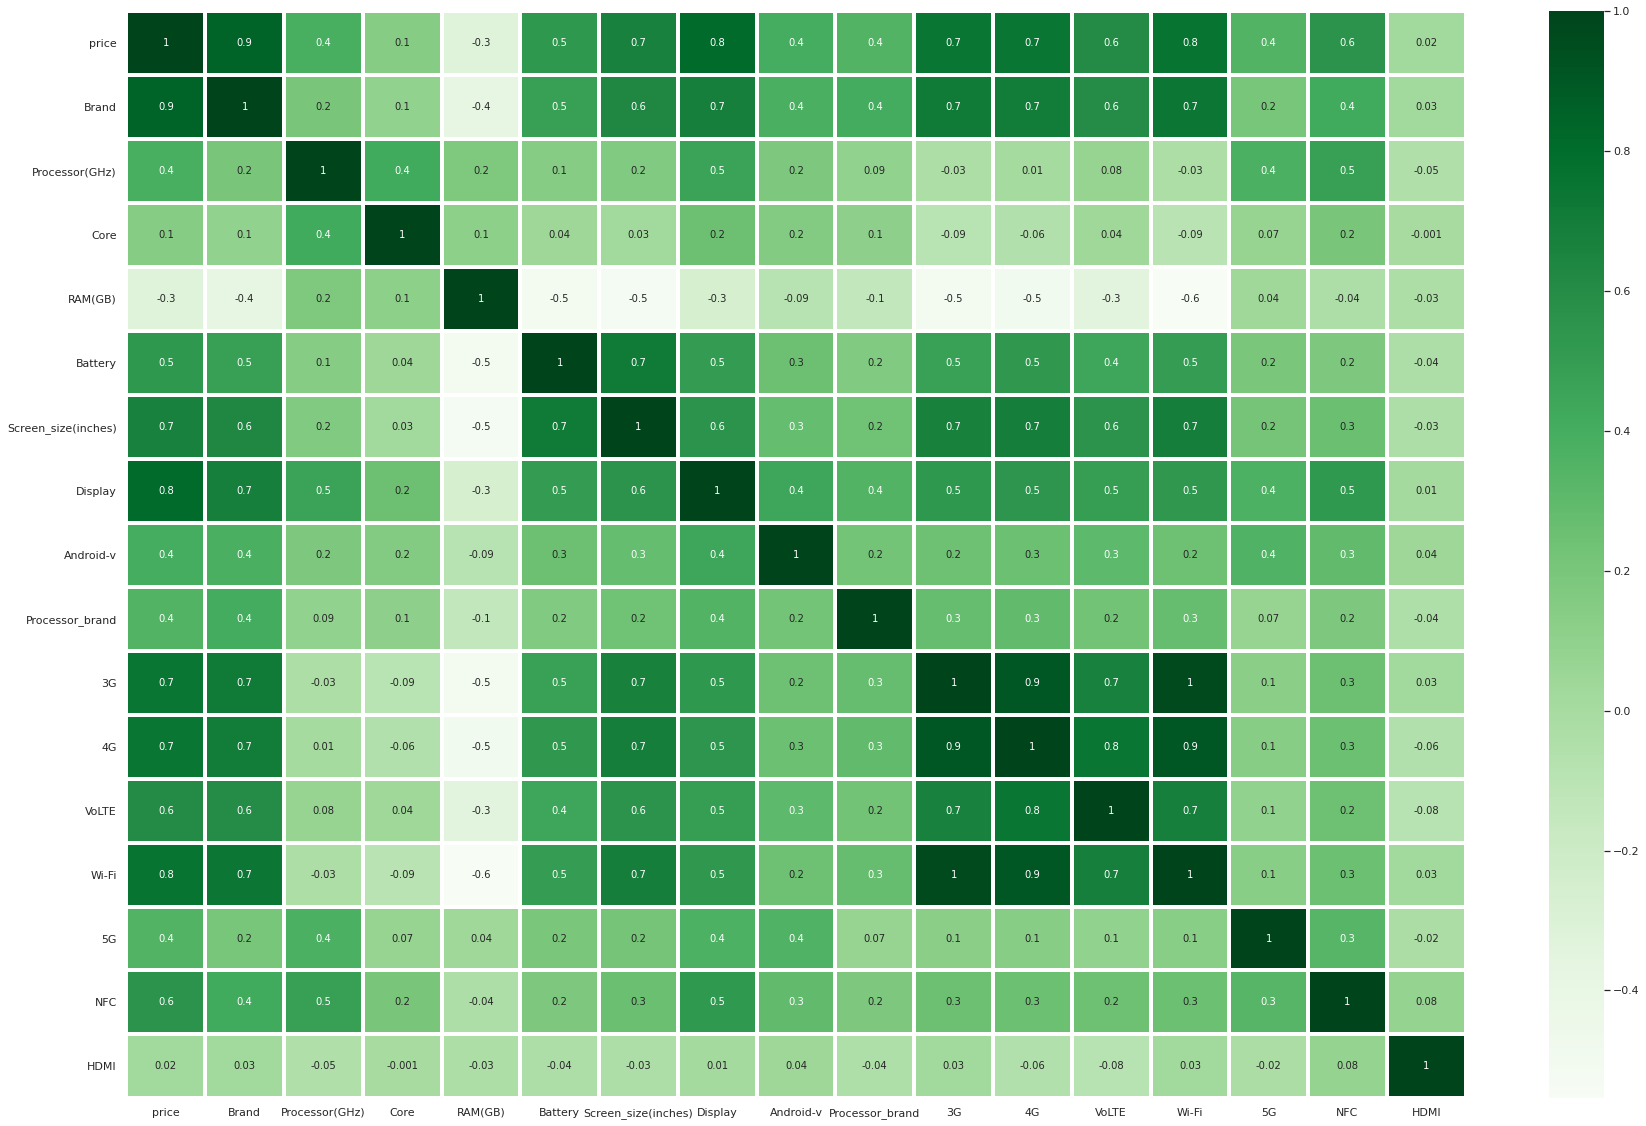

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 

plt.figure(figsize=(30,20))
cmap = sns.cm.rocket_r
sns.heatmap(train_data[['price', 'Brand', 'Processor(GHz)', 'Core', 'RAM(GB)', 'Battery', 'Screen_size(inches)',
       'Display', 'Android-v', 'Processor_brand', '3G', '4G', 'VoLTE', 'Wi-Fi', '5G', 'NFC', 'HDMI']].corr(), annot=True , linewidths=3 , fmt='.1g' , cmap="Greens" )
plt.show()

In [0]:
train_data_f = train_data.drop(['score-val'],axis=1)
Ratings = train_data['score-val']

**Creating Train and validation dataset**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_f,Ratings,test_size=.05)

In [0]:
# lasso
feature_sel_model = SelectFromModel(Lasso(alpha=0.0001, random_state=0)) 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True])

In [0]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 32
selected features: 28


**Selected features**

In [0]:
selected_feat

Index(['price', 'Brand', 'Processor(GHz)', 'Processor', 'Core', 'RAM(GB)',
       'Memory(GB)', 'Battery', 'Screen_size(inches)', 'Display',
       'Memory_card_supported', 'Processor_brand', 'Front_cam_1',
       'Front_cam_2', '3G', '4G', 'VoLTE', 'Wi-Fi', 'IR Blaster', 'Single Sim',
       '5G', 'NFC', 'HDMI', 'Quad_cam', 'Single_cam', 'Triple_cam', 'Dual_cam',
       'Penta_cam'],
      dtype='object')

In [0]:
x_train=x_train[selected_feat]
x_test  =x_test[selected_feat]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score as cvs

# **Model selection**

**Linear Regression model**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_predict=Linear_model.predict(x_test)
abs(y_predict-y_test).mean()

0.029699752712914994

**Ploting Distribution of predicted vs Expected .** 

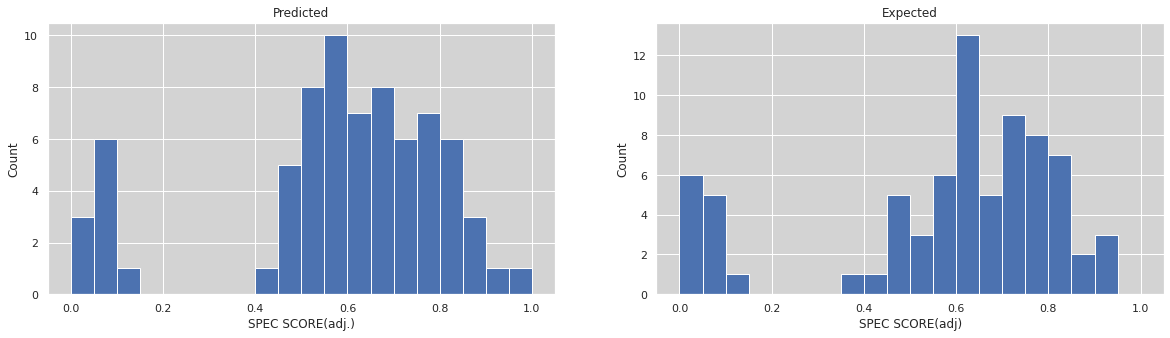

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Random forest** 

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(x_train,y_train)   
RFR_pred = regressor.predict(x_test)

In [0]:
abs(RFR_pred-y_test).mean()

0.020959259259259243

**Hyper parameter tuning for random forest.**

In [0]:
from sklearn.model_selection import GridSearchCV
clf =GridSearchCV(RandomForestRegressor(random_state = 0) ,{
    'n_estimators':[200,100,50]
}, scoring='neg_mean_squared_error',cv=2,return_train_score=False)



clf.fit(x_train,y_train)   
RFR_pred_grid = clf.predict(x_test)

In [0]:
output = pd.DataFrame(clf.cv_results_)
output

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.900402,0.001996,0.028968,0.000097,200,{'n_estimators': 200},-0.001337,-0.001173,-0.001255,0.000082,2
1,0.475037,0.025200,0.017172,0.000095,100,{'n_estimators': 100},-0.001336,-0.001167,-0.001252,0.000084,1
2,0.242935,0.005134,0.008916,0.000375,50,{'n_estimators': 50},-0.001349,-0.001206,-0.001277,0.000071,3


In [0]:
abs(RFR_pred_grid-y_test).mean()

0.020959259259259243

**Ploting Distribution of predicted vs Expected .** 

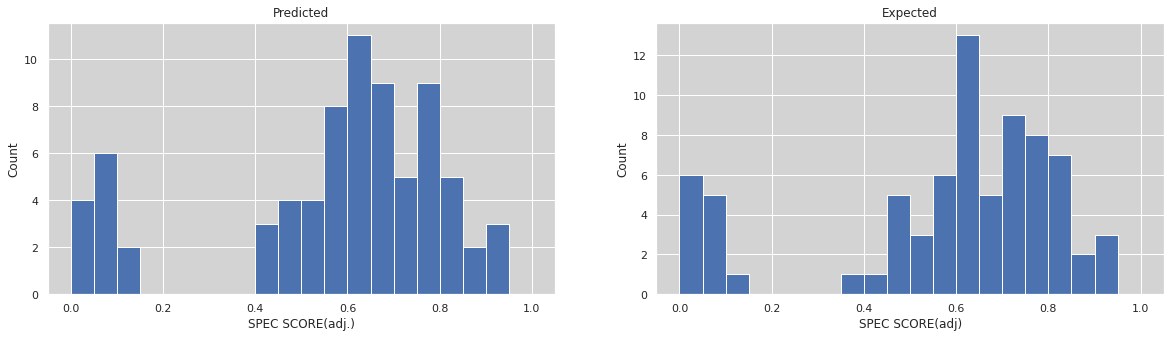

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(RFR_pred_grid , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**XGB boost**

In [0]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

eval_set = [(x_train, y_train), (x_test, y_test)]
xgb_model.fit(x_train,y_train , eval_set=eval_set ,verbose=False , eval_metric='mae' )

[11:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.02,
             eval_metric='mae', gamma=0, importance_type='gain',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=None, n_estimators=200, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [0]:
y=xgb_model.predict(x_train)

In [0]:
abs(y-y_train).mean()

0.003010873310747203

In [0]:
y_predict=xgb_model.predict(x_test)

**Absolute mean difference is better than linear regression.**

In [0]:
abs(y_predict-y_test).mean()

0.019566735797458233

**Ploting Distribution of predicted vs Expected on traning dataset .** 

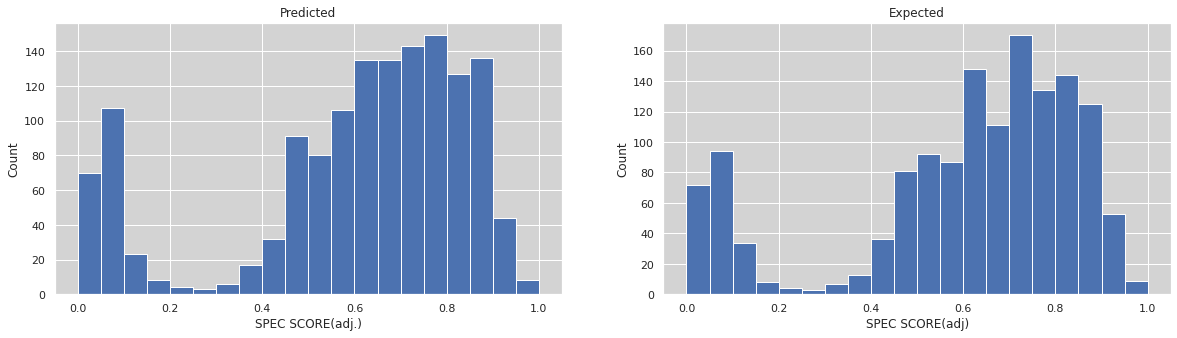

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_train , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**Ploting Distribution of predicted vs Expected on validation dataset.** 

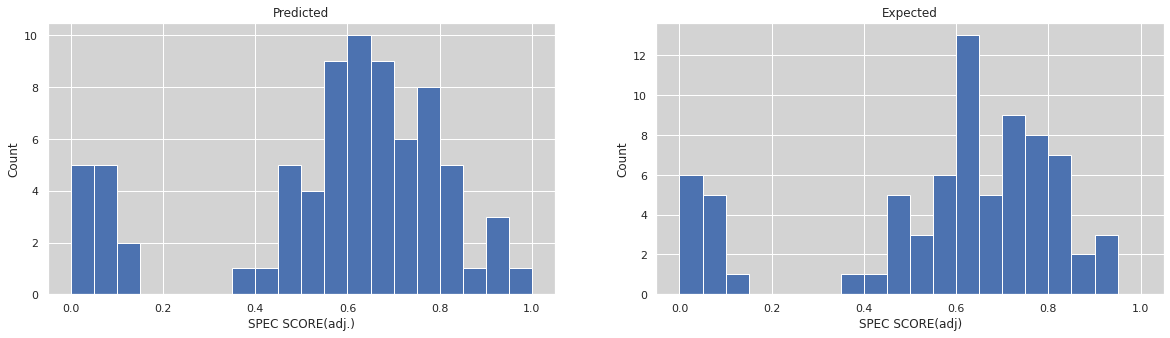

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
from matplotlib import pyplot

**Plotting learning curve.**

In [0]:
results = xgb_model.evals_result()
epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

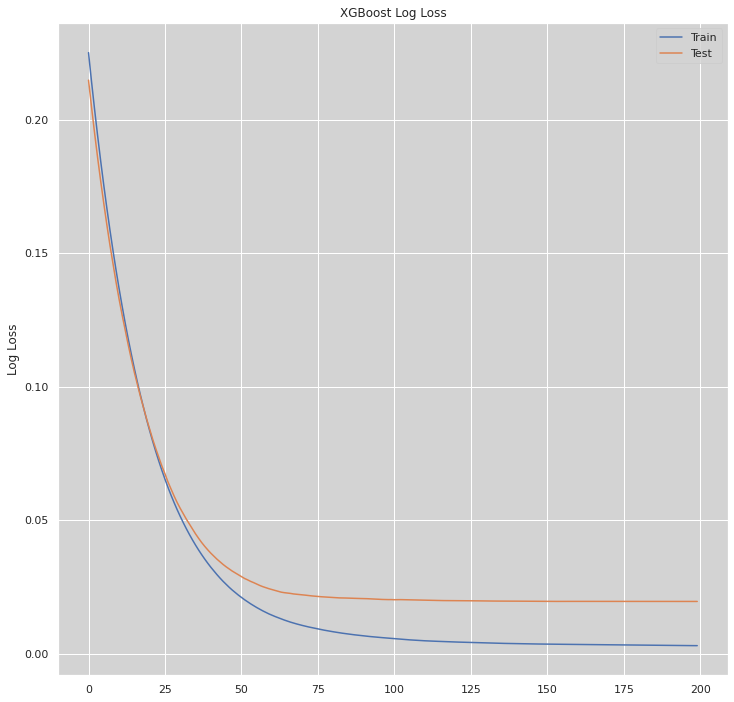

In [0]:
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

**Hyper parameter tuning XGBboost**

In [0]:
params={
 "learning_rate"    :[0.05,0.02,.01],
 'eta'              :[0.02],
 "max_depth"        :[ 10, 20 ,30 , 40],
  "n_estimators"    :[100, 200],
  "early_stopping_rounds":[10], 
  "eval_metric" : ["mae"], 
  "eval_set" : [[x_test, y_test]],
  'min_child_weight':[3]
}

In [0]:
classifier = XGBRegressor()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
xgb_clf=GridSearchCV(classifier, params, verbose=1,             
         cv=TimeSeriesSplit(n_splits=5).get_n_splits([x_train, y_train]))

**Preparing TEST dataset for testing.**

In [0]:
test_data.drop(['Unnamed: 0','name','pid','rating'],inplace=True,axis=1)
test_data = pd.DataFrame(scaler.transform(test_data[feature_scale]), columns=feature_scale)
test_data_f = test_data.drop(['score-val'],axis=1)
test_data = test_data[selected_feat]



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
test_data_f=test_data_f[selected_feat]

In [0]:
xgb_clf.fit(x_train,y_train)   

In [0]:
xgb_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             eta=0.02, eval_metric='mae',
             eval_set=[         price     Brand  Processor(GHz)  ...  Triple_cam  Dual_cam  Penta_cam
9     0.784307  0.870588        0.867347  ...    0.000000  0.000000        0.0
1262  0.215441  0.076471        0.612245  ...    0.000000  0.000000        0.0
942   0.619134  0.758824        0.612245  ...    0.00...
47      0.611111
1413    0.844444
688     0.888889
1282    0.777778
Name: score-val, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.05,
             max_delta_step=0, max_depth=20, min_child_weight=3, missing=None,
             n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
y_predict =xgb_clf.predict(x_train)

In [0]:
y_predict_test =  xgb_clf.predict(x_test)

In [0]:
abs(y_predict_test-y_test).mean()

0.020204216391951954

In [0]:
y_predict_best =  xgb_clf.predict(test_data_f)

In [0]:
r=data['score-val'][:1500].max()-data['score-val'][:1500].min()
r

90

**MAE on test dataset.**

In [0]:
abs(y_predict_best-(data['score-val'][1500:]-data['score-val'][:1500:].min())/r).mean()

0.018188891709796966

**Expected MAE if model doens't work.**

In [0]:
abs(y_test.mean()-y_test).mean()

0.19338271604938276

**predicted result on test data(validation dataset) vs actual result on validation dataset) vs actual result on trained data.**

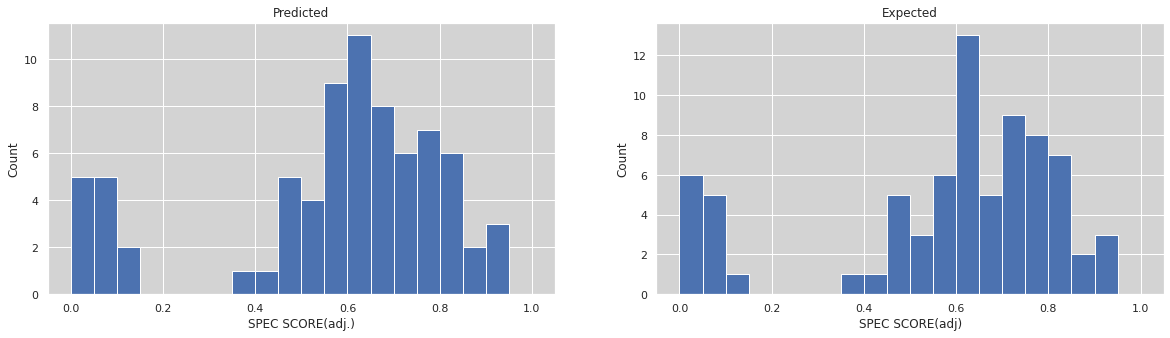

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist(y_test , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

**predicted result on seperate test data vs actual result on test data.**

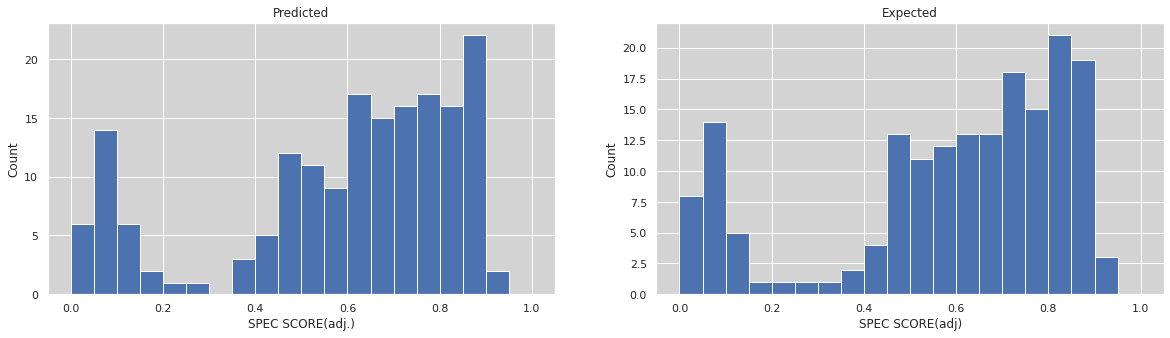

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
ax1.hist(y_predict_best , bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax2.hist( (data['score-val'][1500:]-data['score-val'][:1500:].min())/r, bins=[0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1])
ax1.set_title('Predicted')
ax2.set_title('Expected')
ax1.set_xlabel('SPEC SCORE(adj.)')
ax2.set_xlabel('SPEC SCORE(adj)')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')
plt.show()

In [0]:
y_predict = y_predict_best

**Rescaling to original data .**

In [0]:
y_predict = y_predict*(r)+data['score-val'][1500:].min()
y_predict[:5]

array([60.02976, 80.24876, 80.21979, 84.07873, 67.32643], dtype=float32)

In [0]:
orig_df['predict']=y_predict
orig_df.head()

,pid,score-val,predict
1500,pd177qoyl3i,54,60.029758
1501,pd1mhybj7g2,81,80.248756
1502,pd1bchr1cwt,81,80.219788
1503,pd1c4vgk4ap,84,84.078728
1504,pd1ugs68pd4,70,67.326431


**Checking whether our prediction is higly correleted with result or not.**

In [0]:
orig_df[['predict','score-val']].corr()

,predict,score-val
predict,1.000000,0.995425
score-val,0.995425,1.000000


**Expected error if our model is not working**

In [0]:
diff_error=(abs(orig_df['score-val']-orig_df['score-val'].mean())).mean()
diff_error

19.004081632653065

In [0]:
abs(orig_df['score-val']-orig_df['predict']).mean()

1.6370002692086356

**Our Result Shows a mean absolute error of around 1.63700 which means the predicted result will around 1.63% deviation from its true value.**